In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
from datetime import datetime

In [20]:
# load in the csv file, you need to specify the directory of the data file
infile = '../data/processed/Cleaned_mooring_2020.csv'
# colnames = ['Temp_AC','Sal_AC','Fluor_AC','Chl_AC','Temp_NY','Sal_NY','Fluor_NY','Chl_NY','Temp_NY_btm','Sal_NY_btm','Fluor_NY_btm','Chl_NY_btm','DateTime_NY']
data = pd.read_csv(infile, skiprows = [12,14], parse_dates=['Date_Time_NY'], infer_datetime_format=True, sep = ',')

In [21]:
data.shape

(12190, 15)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12190 entries, 0 to 12189
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date_Time_NY        12190 non-null  datetime64[ns]
 1   Temp_NY             12178 non-null  float64       
 2   Sal_NY              12010 non-null  float64       
 3   Chl_NY              12181 non-null  float64       
 4   DO_NY               12181 non-null  float64       
 5   Depth_meter_NY      12182 non-null  float64       
 6   Temp_AC             8925 non-null   float64       
 7   Sal_AC              7600 non-null   float64       
 8   Chl_AC              8964 non-null   float64       
 9   Depth_meter_AC      8964 non-null   float64       
 10  Temp_NY_btm         11090 non-null  float64       
 11  Sal_NY_btm          11036 non-null  float64       
 12  Chl_NY_btm          12134 non-null  float64       
 13  DO_NY_btm           12134 non-null  float64   

In [23]:
# replace -99 with NaN
data.replace(-99, np.nan, inplace=True)
data.replace(-105.744, np.nan, inplace=True)

In [24]:
data.describe()

,Temp_NY,Sal_NY,Chl_NY,DO_NY,Depth_meter_NY,Temp_AC,Sal_AC,Chl_AC,Depth_meter_AC,Temp_NY_btm,Sal_NY_btm,Chl_NY_btm,DO_NY_btm,Depth_meter_NY_btm
count,12178.000000,12010.000000,12181.000000,12181.000000,12182.000000,8925.000000,7600.000000,8964.000000,8964.000000,11090.000000,11036.000000,12134.000000,12134.000000,12136.000000
mean,26.362522,18.748600,22.301847,6.590479,0.874439,28.036616,17.056075,28.165335,0.650172,25.805808,19.420160,28.077300,6.077214,5.183622
std,2.954320,1.834803,30.556052,1.730420,0.330456,3.507052,2.011206,23.129367,0.325114,2.925398,2.083815,46.246964,1.335137,0.358782
min,18.970000,15.130000,4.752860,0.900000,0.060000,16.990000,10.730000,6.344380,0.001000,18.950000,13.970000,6.685420,0.930000,-0.030000
25%,24.380000,17.270000,11.005260,5.540000,0.610000,26.930000,15.850000,15.779820,0.382000,23.580000,17.640000,13.392540,5.230000,4.930000
50%,27.200000,18.690000,14.188300,6.460000,0.880000,29.170000,17.170000,21.804860,0.654000,26.670000,19.340000,15.893500,6.140000,5.180000
75%,28.620000,19.960000,20.554380,7.290000,1.130000,30.380000,18.610000,31.922380,0.905000,28.070000,21.140000,27.375180,6.900000,5.460000
max,32.110000,23.330000,575.199100,18.810000,1.930000,34.830000,21.170000,575.199100,1.695000,31.160000,24.230000,575.199100,13.470000,6.300000


In [25]:
cols= ['Temp_AC','Temp_NY','Sal_AC','Sal_NY','Chl_AC','Chl_NY','Date_Time_NY']
data = data[cols]

#### plot variables against datetime

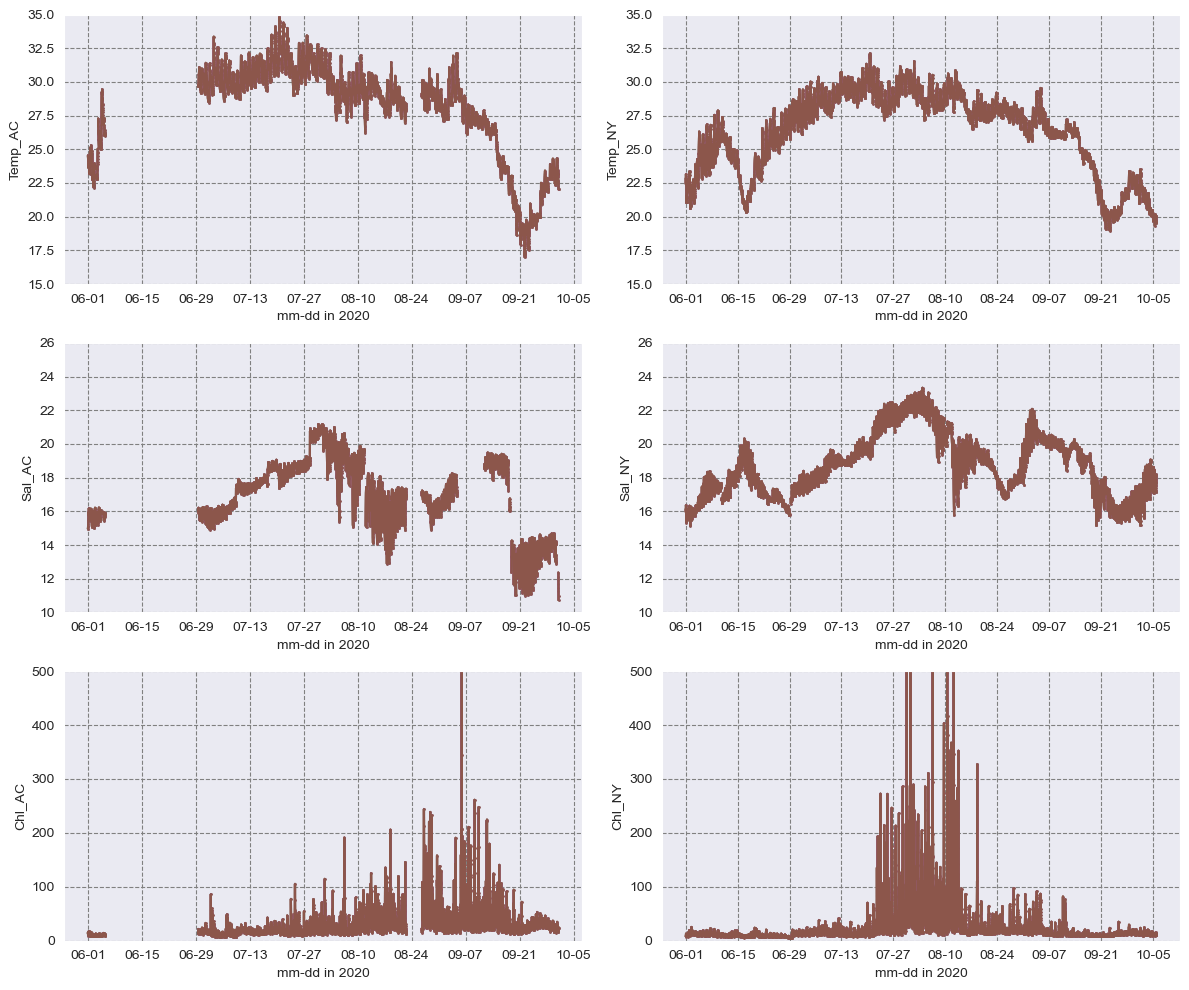

In [26]:
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
nrows, ncols = 3, 2
y_limits = [(15, 35), (15, 35), (10, 26), (10, 26), (0, 500), (0, 500)]
i_range = [0,1,2]
j_range = [0,1]
for n in range(1, 7):
    for i in i_range:
        for j in j_range:
            axes[i,j] = plt.subplot(nrows, ncols, n)
            axes[i,j].plot(data['Date_Time_NY'], data.iloc[:,n-1], marker='o', markersize=0.5)
            axes[i,j].set_xlabel('mm-dd in 2020')
            axes[i,j].set_ylabel(data.columns[n-1])
            axes[i,j].set_ylim(y_limits[n-1] )
            axes[i,j].grid(True, color='gray', linestyle='--')
            axes[i,j].xaxis.set_major_locator(mdates.DayLocator(interval=14)) # Set the y-axis tick locator and formatter
            axes[i,j].xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
            xticks = [np.arange(dt.datetime(2020, 6, 1), dt.datetime(2020, 10, 6), dt.timedelta(days=14))]
            date_vector = np.ravel(xticks) # Flatten the numpy array into a one-dimensional vector
            axes[i,j].set_xticks(date_vector)

plt.tight_layout()
plt.show()